## <center> Basement heterogeneity 

### <center> Reconcavo Basin, Brazil

In [1]:
# importando pacotes necessarios:
import numpy as np # pacote numerico
import pylab as py 
import pandas as pd
import matplotlib.pyplot as plt # pacote de plotagem
#para plotar as figuras nas celulas do jupyter notebook:
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import sys
%matplotlib qt
#import utm
#plt.plot ([1,2])

## Importação dos dados do perfl

In [2]:
boug_residual, UTMe, UTMn= np.loadtxt('bouguer_recon_perfil_MONO.txt',
                                             skiprows=1, usecols=(0,3,4), unpack=True)
np.size(UTMe)

914

## Leitura dos modelos de bacia

In [4]:
#leitura dos dados do modelo

#a=sys.path('Users\thais\Desktop\scripts\Dados finais\model_basin_reconcavo5.txt')
rho_ref = 3.0 # densidade do embasamento

modelo= pd.read_csv('Dados finais/model_basin_reconcavo5.txt', sep=' ', header=0 )
xv=modelo['Easting(m)']
zv=modelo['depth(m)']

area=[min(xv),max(xv), min(zv),max(zv)]

In [5]:
#leitura dos dados do ajuste

ajuste= pd.read_csv('Dados finais/datafit5.txt', sep=' ', header=0 )
grav=np.array(ajuste['Gpred(mGal)'])
gobs=np.array(ajuste['Gobs(mGal)'])
#ajuste

In [6]:
#leitura dos dados de densidade
density= pd.read_csv('Dados finais/density5.txt', sep=' ', header=0 )
Z=np.array(density['Z'])
rhoz=np.array(density['rhoZ'])

#density

## Importação dos módulos


In [7]:
from modules.iplots import pick_points, model_masses # para fazer o plot interativo
from modules.gravity import grav2D_anom, g_sphere # funcao que calcula dados de gravidade (rao 1994)

## Inclusão das heterogeneidades

In [20]:
# limites para os contrastes de densidade da intrusao (g/cm3)
arearho= [-0.6,-0.7,-0.6, -0.7]

In [21]:
elev=np.zeros((np.size(UTMe)))

In [22]:

%matplotlib qt
# obtencao das coordenadas 2D e a densidade da intrusao atraves de clicks:
xb, zb, rhob = model_masses(area, arearho, background=[xv,zv])

In [23]:
# Calcular a anomalia produzida pelas bolinhas:
intruso=[] # lista para guardar todas as bolinhas:
for i in range(len(xb)):
    intruso.append( [ xb[i],zb[i],rhob[i] ] )
gravb = g_sphere(UTMe, elev, intruso, component='z')

## Jogando fora valores extras do perfil

In [24]:
print(len(grav),len(gravb))

728 914


In [25]:
b=np.zeros(len(grav))
UTE=np.zeros(len(grav))

for i in range (len(grav)):
    b[i]=gravb[i]
    UTE[i]= UTMe[i]      

## Cálculo da anomalia

In [26]:
# principio da superposicao para computar o efeito da poligono (grav) + intrusao (gravb}):
gravt = grav + b

## Função para fechar polígono ( TODO)

In [27]:
# get the number of elements of xv (number of vertices of the polygon)
n = np.size(xv)     
# create new working arrays for the vertices of a closed polygon:
x = np.zeros( (n+1,) )  
z = np.zeros( (n+1,) ) 
x[0:n] = xv
z[0:n] = zv
# GAMBIARRA PARA PLOT DE CORES ASSSOCIADOOS À BACIA MODELADA (PENSAR EM ALGO MILHÓ) 
x[n:n+1] = min(xv)
z[n:n+1] = np.min(zv)

## Plot do modelo

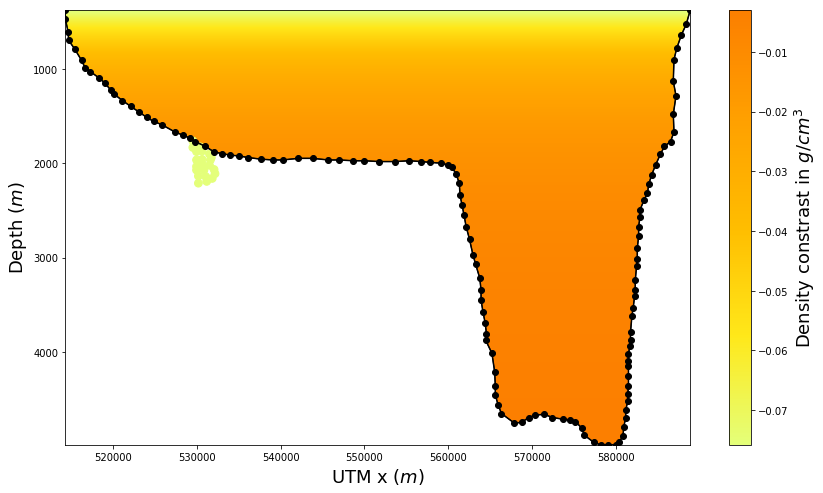

In [28]:
%matplotlib inline
# and the modeled basin:
fig = plt.figure(figsize=(14,8))
path = Path(np.array([x,z]).T)
patch = PathPatch(path, facecolor='none')

#######################################################
plt.gca().add_patch(patch)
plt.plot(xv,zv,'k-o')

# plot the last and the first corner to close up the polygon:
fs = 18 # font size for the label
plt.gca().invert_yaxis()
plt.xlabel(r'UTM x $(m)$',fontsize=fs)
plt.ylabel(r'Depth $(m)$',fontsize=fs)
plt.xlim([np.min(xv), np.max(xv)])

##################################################################
# plot the density variation together with the basin:
##################################################################

im = plt.imshow(rhoz.reshape(np.size(Z),1),  cmap=plt.cm.Wistia, interpolation="bicubic",
                origin='lower',extent=[min(x), max(x), min(z), max(z)],aspect="auto", clip_path=patch, clip_on=True)
#im.set_clip_path(patch)

# OBS:::::: para reverter a escala de cores, basta um simples "_r" ! sucesso de vida!!!!
plt.gca().invert_yaxis()
cbar = plt.colorbar()
cbar.ax.set_ylabel(r'Density constrast in $g/cm^3$', fontsize=fs)


rb = np.array(rhob)-rho_ref
#print (rb)
plt.scatter(xb,zb,s=60,c=rb,cmap='Wistia', vmin=min(rhoz), vmax=max(rhoz) )

# Mat, verificar!!!!!!
#plt.savefig(caminho +".png", dpi=300, transparent=True, bbox_inches='tight')
plt.show()

In [33]:
# save fig and a txt file for reproduction:
caminho = "Dados finais/datafit_int1"
C = np.zeros( (len(UTE),3) )
C[:,0] = UTE
C[:,1] = gravt
C[:,2] = gobs
# save text file for ploting issues:
np.savetxt(caminho+'.txt', C, header=' UTMx(m) Gpred(mGal) Gobs(mGal)', delimiter=' ' )

## Plot do ajuste obtido

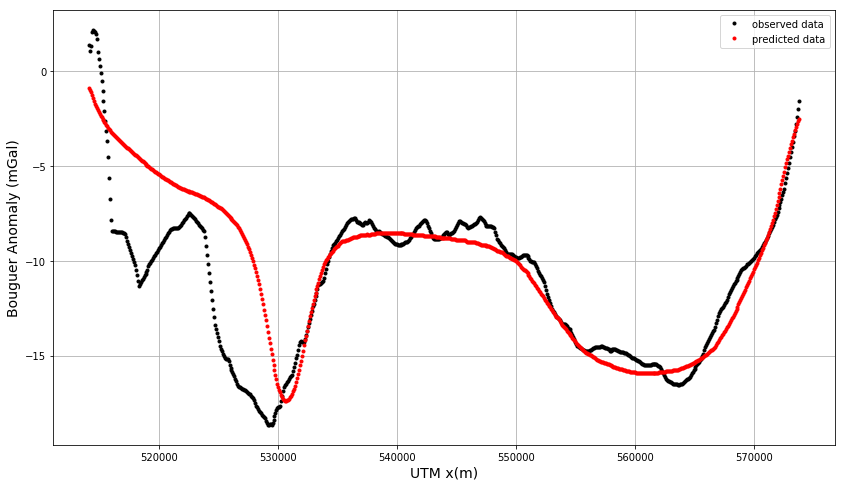

In [29]:
fig = plt.figure(figsize=(14,8))

plt.plot(UTE,gobs,'.k', label='observed data')
plt.plot(UTE,gravt,'.r', label='predicted data')
plt.legend()
plt.grid()
#plt.title ('Gravity Data (mGal)', fontsize = 16)
plt.xlabel ('UTM x(m)', fontsize = 14)
plt.ylabel ('Bouguer Anomaly (mGal)', fontsize = 14)
#plt.savefig(caminho+'png', dpi=300)
plt.show()

In [ ]:
# save fig and a txt file for reproduction:
caminho = "Dados finais/model_intrusion1"

B = np.zeros( (len(z),2) )
B[:,0] = x
B[:,1] = z

# save text file for ploting issues:
np.savetxt(caminho+'.txt', B, header=' Easting(m) , depth(m)', delimiter=' ' )